In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
DATA = '/Users/krishnakalyan3/Educational/PumpIt/data/original/'

# Explore Data

In [4]:
train_x = pd.read_csv(DATA + 'train_set_values.csv')
test_x = pd.read_csv(DATA + 'test_set_values.csv')

In [13]:
import numpy as np
len(np.bincount(train_x['num_private']))

1777

In [5]:
train_x.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


59k rows and 40 columns

In [6]:
train_x.shape

(59400, 40)

### The following questions asked for EDA
- Missing Values
- Numerical Values
- Latitiude and Logitude
- Target
- Categorical Values

#### Missing Values 

In [19]:
train_x.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

The following columns have missing values. The column `scheme_name` has maximum missing values 

In [38]:
cols_missing = ['permit', 'scheme_name', 'scheme_management', 'public_meeting', 'subvillage', 'installer', 'funder'] 

#### Latitiude and Logitude

In [63]:
lat_long = ['latitude', 'longitude'] 

In [64]:
train_x[lat_long].describe()

,latitude,longitude
count,5.940000e+04,59400.000000
mean,-5.706033e+00,34.077427
std,2.946019e+00,6.567432
min,-1.164944e+01,0.000000
25%,-8.540621e+00,33.090347
50%,-5.021597e+00,34.908743
75%,-3.326156e+00,37.178387
max,-2.000000e-08,40.345193


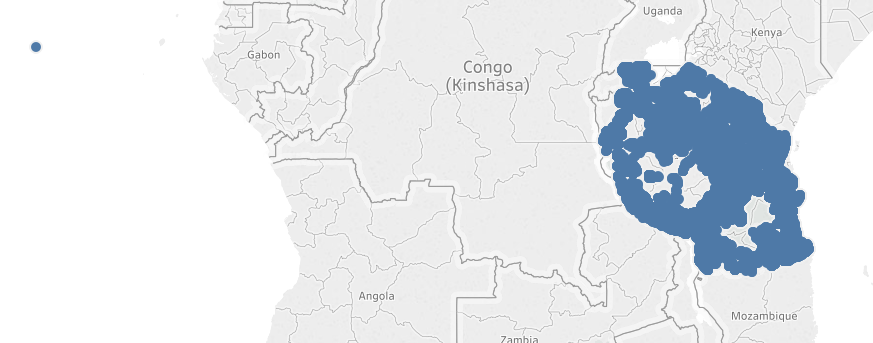

In [75]:
from IPython.display import Image
Image(filename='/Users/krishnakalyan3/Educational/PumpIt/img/lat_long.png')

We see that most of Tanzania is covered in out lat and long coordinates. Some spots in the middle seem to have no access to water.

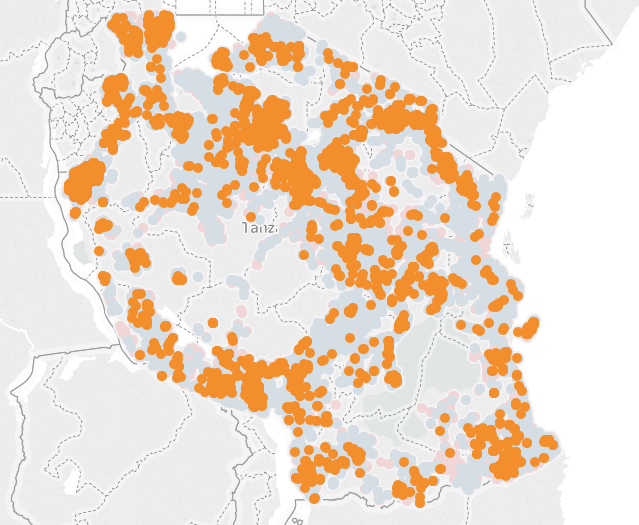

In [76]:
from IPython.display import Image
Image(filename='../img/repair.png')

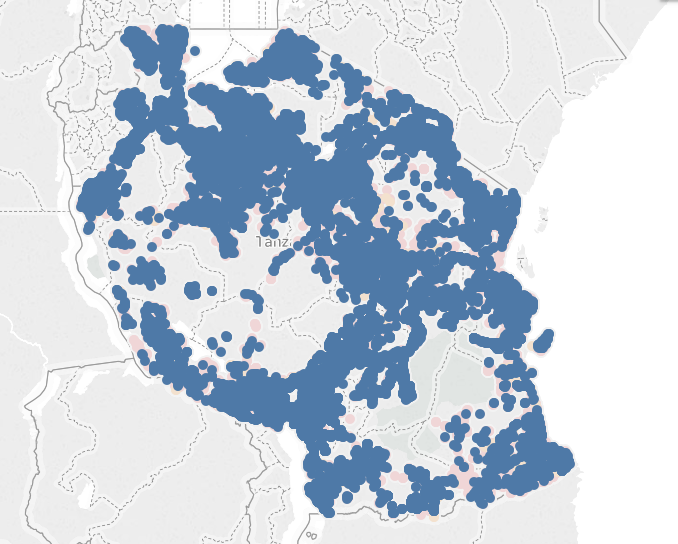

In [77]:
from IPython.display import Image
Image(filename='../img/func.png')

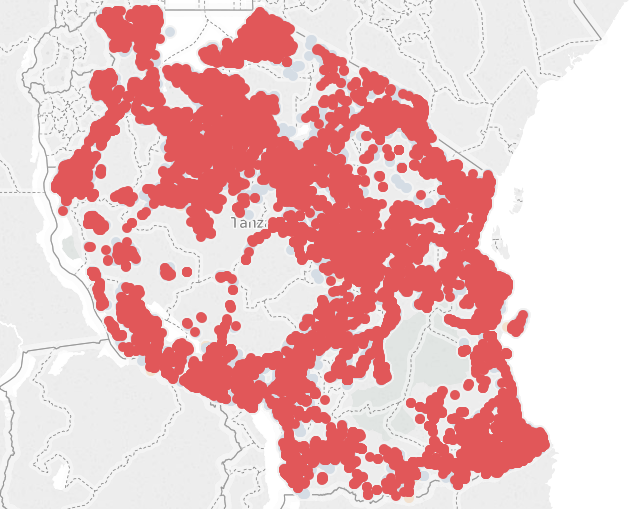

In [78]:
from IPython.display import Image
Image(filename='../img/non_func.png')

The above 3 plots describe the water pumps that need repair, functional and non functional

#### Understand Target

In [21]:
train_y = pd.read_csv(DATA + 'train_set_labels.csv')

In [22]:
train_y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Looking at the value counts below the targets are imabalanced. Need to work on better sampling stratergies

In [29]:
train_y['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [80]:
# Handling date [date_recorded, construction_year]
# Handling lat and long
# What is num_private?

Conclusions
- I think there might be a relation between non functional pumps and construction_year.  